# **FLOORPLANING** 

In [1]:


import random
import matplotlib 
import matplotlib.pyplot as plt 
import math
import time


#--------------------------Given set of input block dimensions---------------------------------#

block_dimensions=[[1, 10, 5,8, 6,4, 13,5, 11],
                  [2, 10, 3,8, 4, 4, 9, 5, 6],
                  [3, 5, 8, 7, 6, 3, 13, 2, 20],
                  [4, 7, 8, 10, 6, 8, 7, 9, 6],
                  [5, 3, 2, 1, 7, 2, 4, 5, 1]]
    
#-----------------------------------Connectivity matrix--------------------------------#

connectivity_matrix =[[0, 1, 1, 0, 0],
                      [1, 0, 1, 1, 0],
                      [1, 1, 0, 1, 1],
                      [0, 1, 1, 0, 1],
                      [0, 0, 1, 1, 0]]

#-----------------Obtaining block ids from given input-Block_dimensions----------------#
block_ids=[]
for i in range(len(block_dimensions)):
  block_ids.append(block_dimensions[i][0])
#print(block_ids)


**initial_polish_exp:** Creates initial polish expression

In [2]:
def initial_polish_exp(no_of_ip_blocks):
  len_pol_exp = 2*no_of_ip_blocks - 1
  polish_expression = []
  c=0
  for i in range(len_pol_exp):
      
        if (i%2 == 0 and i != 0 and i != 1):
            if (c%2==0):
               polish_expression.append('H')
            else:
               polish_expression.append('V')
            c=c+1
            
        elif (i == 0 or i == 1):
            polish_expression.append(i+1)
            j = 3
       
        else:
            polish_expression.append(j)
            j = j+1
            
  return (polish_expression)

**postorder_to_inorder**: This module converts polish expression which is postorder traversal to inorder traversal. **checking_if_done** is helper module for this conversion.

In [3]:
def checking_if_done(polish_exp_temp, inorder, done, done_index):
    
    for i in range(len(done)):
        if (polish_exp_temp[i] in inorder):
            done_index = i + 1
        else:
            break

    return done_index

def postorder_to_inorder(polish_exp_temp,operators,operands):

    inorder = []
    num_stack = []
    char_stack = []
    num = 1
    done = [0]*len(polish_exp_temp)
    done_index = 0

    i = 0
    while (len(inorder)<len(polish_exp_temp)):

        x = polish_exp_temp[i]

        if ( (x in operands) and (num == 1) ):
            inorder.append(x)
            num = 0
            i = checking_if_done(polish_exp_temp,inorder,done,done_index)
            num_stack=[]
            char_stack=[]
        elif ((x in operands) and (num == 0) ):
            num_stack.append(x)
            i = i + 1

        elif ((x in operators) and ((len(num_stack) - 1) == (len(char_stack)))):
            inorder.append(x)
            num = 1
            i = checking_if_done(polish_exp_temp,inorder,done,done_index)
            if (len(num_stack)>0):
                inorder.append(num_stack[0])
                num = 0
                i = checking_if_done(polish_exp_temp,inorder,done,done_index)

            num_stack=[]
            char_stack=[]

        elif ((x in operators) and ((len(num_stack) - 1) != (len(char_stack)))):
            char_stack.append(x)
            i = i + 1

    return inorder

print(postorder_to_inorder([1, 2, 'H', 3, 4, 'V', 'H',5, 'V'],['H','V'],[1,2,3,4,5]))


[1, 'H', 2, 'H', 3, 'V', 4, 'V', 5]


**move1:** Subfunction of **perturb** method, exchanges two operands that have no other operands in between

In [4]:
def move1(pol_exp):
 
    polish_exp_temp = pol_exp[:]
    len_exp = len(polish_exp_temp)
    operands=[]

    for i in polish_exp_temp:
      if (i !='H' and i!='V'):
        operands.append(i)

    i1=random.randint(0,len(operands)-1)
    node1=operands[i1]
    if (i1==len(operands)-1):
      node2=operands[i1-1]
    else:
      node2=operands[i1+ 1]
    
    for j in range(len_exp):
      if (node1==polish_exp_temp[j]):
        loc1=j
      if (node2==polish_exp_temp[j]):
        loc2=j   

    polish_exp_temp[loc1]=node2
    polish_exp_temp[loc2]=node1
    
    return polish_exp_temp
    

**move2:** Subfunction of perturb method, complements a series of operators between two operands

In [5]:
def move2(polish_exp):

    polish_exp_temp = polish_exp[:]
    len_chain = []
    loc = []
    
    for i in range(0,len(polish_exp_temp)-1):
      if (polish_exp_temp[i]=='H' or polish_exp_temp[i]=='V'):
        loc.append(i)
        len_chain.append(1)
        j=i+1
        if (j==len(polish_exp_temp)):
          break
        while (polish_exp_temp[j]=='H' or polish_exp_temp[j]=='V'):
          len_chain[len(loc)-1]=len_chain[len(loc)-1]+1
          j=j+1
          if (j == len(polish_exp_temp) ):
                    break

    len_loc = len(loc)
    rand_loc = 0

    if (len_loc>1):
        rand_loc = random.randint(0, len_loc-1)

    i = loc[rand_loc]
    while (i < (loc[rand_loc] + len_chain[rand_loc] )):
        if(polish_exp_temp[i] == 'V'):
            polish_exp_temp[i] = 'H'
        elif(polish_exp_temp[i] == 'H'):
            polish_exp_temp[i] = 'V'
        i = i + 1

    return polish_exp_temp

**move3:** Subfunction of **perturb** method, exchanges adjacent operand and operator if the resulting expression is still normalized polish expression

In [6]:
def move3(polish_exp):
    
    polish_exp_temp = polish_exp[:]
    len_exp = len(polish_exp_temp)

    operator = ['H','V']
    pol = range(1,len_exp+1)
    location=[]

    for i in range(len_exp-1):
      if (polish_exp_temp[i] in operator and polish_exp_temp[i+1] in pol):
          location.append(i)
      elif (polish_exp_temp[i] in pol and polish_exp_temp[i+1] in operator):
          location.append(i)

    r=random.randint(0,len(location)-1)
    loc=location[r]
    temp=polish_exp_temp[loc]
    polish_exp_temp[loc]=polish_exp_temp[loc+1]
    polish_exp_temp[loc+1]=temp

    return ( polish_exp_temp)


**balloting_property**: Checks if given polish expression satisfies balloting property i.e., Number of operands > Number of operators

In [7]:
def balloting_property(polish_exp):
  polish_exp_temp=polish_exp[:]
  count1=0
  count2=0
  for i in range(0,len(polish_exp)-1):
    if (polish_exp[i]=='H' or polish_exp[i]=='V'):
      count1=count1+1
    else:
      count2=count2+1

  if (count2>count1):
    return 0
  else:
    return 1





**normalizes_exp**: Checks if given polish expression is normaized or not. That means no two adjacent operators has to be same. 

In [8]:
def normalized_exp(polish_exp):
  
  
  for i in range(0,len(polish_exp)-1):
    if ((polish_exp[i]=='H' and polish_exp[i+1]=='H') or (polish_exp[i]=='V' and polish_exp[i+1]=='V')):
      return 1
    
  return 0
   


**check_if_binary_slicing_tree**: This Module checks if given polish expression is Binary slicing tree

In [9]:
def check_if_binary_slicing_tree(pol_exp):
  operands=[]
  operators=[]
  ch=0;cv=0
  update=pol_exp[:]
  if pol_exp[2] not in ['H', 'V']:
    return 1
  for i in range(len(pol_exp)):
    if pol_exp[i] not in ['H', 'V']:
      operands.append(pol_exp[i])
    elif (pol_exp[i]=='H'):
      operators.append('H'+str(ch))
      update[i]='H'+str(ch)
      ch=ch+1
    else:
      operators.append('V'+str(cv))
      update[i]='V'+str(cv)
      cv=cv+1
 # print(update)
 # print(operators)
  #print(operands)
  pol=postorder_to_inorder(update,operators, operands)
 # print(pol)
  
  check1=pol[0::2]
  check2=pol[1::2]
 # print(check1)
 # print(check2)
  
  if (check1!=operands and check2!=operators):
    return 1
  else:
    return 0
     
  

print(check_if_binary_slicing_tree([1, 2,'H', 3, 4, 'H', 5,'H', 'V']))

0


**perturb**: Performs different pertubation moves, it chooses moves randomly and also makes sure that polish expression doesn't violate balloting property and remains normalized. It also ensures that polish expression is a binary slicing tree.

In [10]:
def perturb(polish_expression):

    polish_exp_temp = polish_expression[:]
    move_no = random.randint(1,3)
    #move_no=3
    if (move_no == 1):
        polish_exp_temp1 = move1(polish_exp_temp)
    elif (move_no == 2):
        polish_exp_temp1 = move2(polish_exp_temp)
    else:
        polish_exp_temp1= move3(polish_exp_temp)
        while (balloting_property(polish_exp_temp1) == 1 or normalized_exp(polish_exp_temp1) == 1
           or check_if_binary_slicing_tree(polish_exp_temp1) ==1):
            #print(1)

            polish_exp_temp1= move3(polish_exp_temp)
    
            #return ( perturb(polish_exp_temp1))
    return (polish_exp_temp1)
print(perturb([1,2,'H',3,'V',4,'H',5,'V']))

[1, 2, 'H', 3, 'H', 4, 'H', 5, 'V']


**H1_dimension**: Subfunction of area method, given two blocks which are operands and are horziontally sliced then it computes minimum possible resulting area of combination. Then returns the dimensions of the combined block which is then added to stack in area module.

In [11]:
def H1_dimension(block1,block2,block_dimensions,sizes, combined_size):
  

  w1s= block_dimensions[block1-1][1::2] 
  h1s= block_dimensions[block1-1][2::2] 
  w2s= block_dimensions[block2-1][1::2] 
  h2s= block_dimensions[block2-1][2::2] 
 # print(w1s,h1s, w2s, h2s)

  
  areas=[]
  temp=[]
  for i in range(len(w1s)):
    temp=[]
    for j in range(len(w1s)):
      temp.append(max(w1s[i],w2s[j])*(h1s[i]+h2s[j]))
    areas.append(temp)

 # print(areas)
  min=areas[0][0]
  h=0;k=0;
  for i in range(len(areas)):
    for j in range(len(areas)):
      
       if (areas[i][j]<min):
           min=areas[i][j]
           h=i
           k=j
  
  w2=w2s[k]
  h1=h1s[h]
  h2=h2s[k]
  w1=w1s[h]

  t=[ w1, h1]
  sizes.append(t)
  
  q=[ w2, h2]
  sizes.append(q)
  
  dim=[]
  dim.append(max(w1,w2))
  dim.append(h1+h2)
  combined_size.append(t)
  combined_size.append(q)
  combined_size.append([max(w1,w2), h1+h2])

  return (dim, sizes, combined_size)
 
k=[];l=[]
H1_dimension(1,3,block_dimensions,k,l)


([5, 19], [[5, 11], [5, 8]], [[5, 11], [5, 8], [5, 19]])

**H2_dimension:** Subfunction of area method, given one block which is top in the stack and that being a operand and other being combined block in stack and are horziontally sliced then it computes minimum possible resulting area of combination. Thereafter, it returns minimum possible dimensions to area module which adds resulting combined block onto stack.

In [12]:
def H2_dimension(block1, block2, block_dimensions,sizes, combined_size):
  w1s= block_dimensions[block1-1][1::2] 
  h1s= block_dimensions[block1-1][2::2]
  w2=block2[0]
  h2=block2[1]

  areas=[]
  for i in range(len(w1s)):
    areas.append(max(w1s[i],w2)*(h1s[i]+h2))
  
 # print(areas)
  m=areas[0]
  k=0
  for i in range(len(areas)):
    if (m>areas[i]):
      m=areas[i]
      k=i
  w1=w1s[k]
  h1=h1s[k]
  t=[ w1, h1]
  sizes.append(t) 
  dim=[]
  dim.append(max(w1,w2))
  dim.append(h1+h2)
 
  combined_size.append(t)
  combined_size.append(dim)
  return dim, sizes, combined_size
k=[];l=[]
H2_dimension(1,[12,3],block_dimensions,k,l) 

([12, 8], [[10, 5]], [[10, 5], [12, 8]])

**H3_dimension:** Subfunction of area method, given two blocks which are combined blocks popped out from stack and are horziontally sliced then it computes minimum possible resulting area of combination and returns that to area module.

In [13]:
def H3_dimension(block1,block2, combined_size):
  dim=[]
  dim.append(max(block1[0],block2[0]))
  dim.append(block1[1]+block2[1])
  
  combined_size.append(dim)
  return dim, combined_size
  

k=[];
H3_dimension([1,2],[3,6],k)

([3, 8], [[3, 8]])

**V1_dimension:** Subfunction of area method, given two blocks which are operands and are vertically sliced in polish expression then it computes minimum possible resulting area of combination and returns its dimensions.

In [14]:
def V1_dimension(block1,block2,block_dimensions,sizes, combined_size):
   
  w1s= block_dimensions[block1-1][1::2] 
  h1s= block_dimensions[block1-1][2::2] 
  w2s= block_dimensions[block2-1][1::2] 
  h2s= block_dimensions[block2-1][2::2] 
  areas=[]
  temp=[]
  for i in range(len(w1s)):
    temp=[]
    for j in range(len(w1s)):
      temp.append((w1s[i]+w2s[j])*max(h1s[i],h2s[j]))
    areas.append(temp)

  mm=areas[0][0]
  n=0;m=0;

  for ii in range(len(areas)):
    for jj in range(len(areas)) :
       
       if (areas[ii][jj]<mm):
            mm=areas[ii][jj]
            n=ii
            m=jj
  
  w1=w1s[n]
  w2=w2s[m]
  h1=h1s[n]
  h2=h2s[m]
  t=[ w1, h1]
  sizes.append(t)
  q=[ w2, h2]
  sizes.append(q)
   
  combined_size.append(t)
  combined_size.append(q)


  dim=[]
  dim.append(w1+w2)
  dim.append(max(h1,h2))
  combined_size.append(dim)

  return dim, sizes, combined_size

sizes=[];k=[] 
V1_dimension(1,2,block_dimensions,sizes,k)


([13, 6], [[8, 6], [5, 6]], [[8, 6], [5, 6], [13, 6]])

**V2_dimension:** Subfunction of area method, given one block which is operand and other being combined block and are vertically sliced in polish expression then it computes minimum possible resulting area of combination and returns its dimensions.

In [15]:
def V2_dimension(block1, block2, block_dimensions, sizes, combined_size):
  w1s= block_dimensions[block1-1][1::2] 
  h1s= block_dimensions[block1-1][2::2] 

  w2=block2[0]
  h2=block2[1]

  areas=[]
  for i in range(len(w1s)):
    
    areas.append(max(h1s[i],h2)*(w1s[i]+w2))
  
  m=areas[0]
  k=0
  for i in range(len(areas)):
    if (m>areas[i]):
      m=areas[i]
      k=i
  w1=w1s[k]
  h1=h1s[k]
  
  t=[ w1 ,h1]
  sizes.append(t)

  combined_size.append(t)
  dim=[]
  dim.append(w1+w2)
  dim.append(max(h1,h2))
  combined_size.append(dim)
  return dim, sizes, combined_size
  


**V3_dimension:** Subfunction of area method, given two blocks which are combined blocks popped out from stack and are vertically sliced in polish expression then it computes minimum possible resulting area of combination and returns its dimensions.

In [16]:
def V3_dimension(block1,block2, combined_size):
  dim=[]

  dim.append(block1[0]+block2[0])
  dim.append(max(block1[1],block2[1]))
  combined_size.append(dim)
  return dim, combined_size
 # print(dim)
k=[]
V3_dimension([1,2],[3,6],k)

([4, 6], [[4, 6]])

Creating a tree of polish expression whose each node holds its dimension, block id, its coordinates and information about the nodes which are left and right to it.

In [17]:
class node:
    
    def __init__(self, x):
        
        self.id = x                 #holds block id of current node
        self.left = None            #Information about node which is left of current node
        self.right = None           #Information about node which is right of current node
        self.coord = None           #Holds coordinates of current node
        self.dim = None             #Holds dimensions of current node

class Tree:
    
    def buildTree(self, inorder, postorder):
        
        if not inorder or not postorder:
            return None
        
        root = node(postorder.pop())
        inorderIndex = inorder.index(root.id)

        root.right = self.buildTree(inorder[inorderIndex+1:], postorder)
        root.left = self.buildTree(inorder[:inorderIndex], postorder)

        return root





**get_coordinates**: This module calculates coordinates of blocks by traversing through tree (inorder traversal) and adds offsets accordingly such that no two blocks overlaps.

In [18]:
def get_coordinates(root, combined_size, polish_exp_temp, co_ord, operands):

    if (root.id in operands):
        co_ord[root.id - 1] = root.coord

    if (root.left == None and root.right == None):
        return co_ord

    if (root.id[0] == 'H'):
        root.left.coord = root.coord
        root.right.coord = [root.coord[0], root.coord[1] + combined_size[polish_exp_temp.index(root.left.id)][1]]

        co_ord = get_coordinates(root.left,  combined_size, polish_exp_temp, co_ord, operands)
        co_ord = get_coordinates(root.right,  combined_size,  polish_exp_temp, co_ord, operands)

    if (root.id[0] == 'V'):
        root.left.coord = root.coord
        root.right.coord = [root.coord[0] + combined_size[polish_exp_temp.index(root.left.id)][0], root.coord[1]]

        co_ord = get_coordinates(root.left,  combined_size, polish_exp_temp, co_ord, operands)
        co_ord = get_coordinates(root.right,  combined_size, polish_exp_temp, co_ord, operands)    

    return co_ord

**area**: Method that computes overall optimized and minimum area occupied by the given polish expression.

In [19]:

def area(polish_exp, block_dimensions):
  stack=[]
  sizes=[]
  combined_size=[]
  combined_size_list=[]
  updated_operators=[]
  v=0
  h=0
  updated_pol_exp=polish_exp[:]
 
  for i in range(len(polish_exp)):

    if (polish_exp[i]!='H' and polish_exp[i]!='V'):
      stack.append(polish_exp[i])
      
    elif (polish_exp[i]=='H'):
      top=stack.pop()
      bottom=stack.pop()
      
      if (top in polish_exp and bottom in polish_exp):
       
         a,sizes,combined_size=H1_dimension(bottom,top, block_dimensions,sizes,combined_size) 
         stack.append(a)
        
         
      elif (top in polish_exp ):
    
         a,sizes, combined_size=H2_dimension(top, bottom, block_dimensions,sizes, combined_size)
      
         stack.append(a)
         
        
      elif (bottom in polish_exp):
      
         a,sizes, combined_size=H2_dimension(bottom,top,block_dimensions,sizes, combined_size)
         stack.append(a)
        
      else :
  
         a, combined_size=H3_dimension(bottom,top,combined_size)
         stack.append(a)
         
      combined_size_list.append('H' + str(h))
      updated_operators.append(('H' + str(h)))
      updated_pol_exp[i] = 'H' + str(h)
      h=h+1
         
    else:
      
      right=stack.pop()
      left=stack.pop()
      
      if (right in polish_exp and left in polish_exp):

         a,sizes, combined_size=V1_dimension(left,right, block_dimensions,sizes, combined_size)
         stack.append(a)
        
         
      elif (right in polish_exp ):
    
         a,sizes, combined_size=V2_dimension(right,left,block_dimensions,sizes, combined_size)
        
         stack.append(a)
      
      elif (left in polish_exp):
        
         a,sizes, combined_size=V2_dimension(left,right,block_dimensions,sizes, combined_size)
         stack.append(a)
     
       
      else :
      
         a, combined_size=V3_dimension(left,right, combined_size)
         stack.append(a)
         
    
      combined_size_list.append('V' + str(v))
      updated_operators.append(('V' + str(v)))
      updated_pol_exp[i] = 'V' + str(v)
      v=v+1
         
  L=stack.pop()
  operands=[]

  for i in polish_exp:
    if i not in ['H', 'V']:
      operands.append(i)
  
  pol_ish=updated_pol_exp[:]
 

  inpo=postorder_to_inorder(updated_pol_exp, updated_operators, operands)
 
  root = Tree().buildTree( inpo, pol_ish)
  root.dim=L[:]
  root.coord = [0,0]
  co_ord = [[0,0]]*len(operands)
  

  
  co_ord = get_coordinates(root, combined_size, updated_pol_exp, co_ord, operands)

  return L,  L[0]*L[1],  sizes, co_ord
    


**wirelength**: This module computes wirelengths between two connected blocks

In [20]:
def wirelength(adj_matrix, block_dimensions, node_coord, polish_expression):
    
    weight = 0
    n = len(adj_matrix[0])
    operands=[]
    wires=[]
    for k in polish_expression:
      if k not in ['H', 'V']:
        operands.append(k)

    for i in range(n):

        x1 = node_coord[i][0] + (block_dimensions[i][0])/2
        y1 = node_coord[i][1] + (block_dimensions[i][1])/2
        

        for j in range(n):
            if (adj_matrix[i][j] !=0):
                x2 = node_coord[j][0] + (block_dimensions[j][0])/2
                y2 = node_coord[j][1] + (block_dimensions[j][1])/2
                dist = math.sqrt((x2-x1)**2 + (y2 - y1)**2)
                weight = weight + dist*adj_matrix[i][j]
                wires.append([operands[i], operands[j], dist])

    return weight, wires
#print(wirelength(connectivity_matrix, [[10,3], [10,5],[11,3], [3,4], [6,2]],[[0,0],[10, 0], [0,12],[22,0], [3,4]], [1,2,'H', 3, 4, 'H','V', 5, 'V'] ))

**cost_func**: Computes cost which is 0.5(Area) + 0.5(Wirelen)

In [21]:


def cost_func(polish_expression, block_dimensions, adj_matrix):
    
    size, area_of_block, selected_dim, co_ord = area(polish_expression[:], block_dimensions)
    wirelen, wires_connection = wirelength(adj_matrix, selected_dim, co_ord, polish_expression)

    cost = 0.5*area_of_block + 0.5*wirelen 

    return cost,size, area_of_block, co_ord, selected_dim, wires_connection

**simulated_annealing**: Algorithm to determine floorplan of given blocks which has variable block dimensions


 Initial Polish Expression  [1, 2, 'H', 3, 'H', 4, 'H', 5, 'V']

 Initial Size 220 = 11x20


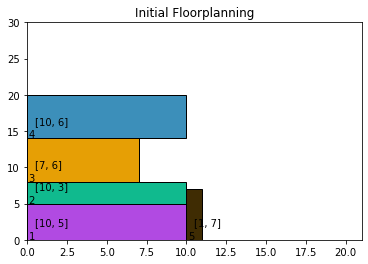

In [ ]:
 def simulated_annealing(adj_matrix, block_ids, block_dimensions):
  no_of_ip_blocks=len(block_ids)                                    # No of ip blocks is same as number of nodes
  cursolution=initial_polish_exp(no_of_ip_blocks)
  noded = dict()
  loop=0
  pol_exp=cursolution[:]
  init_temp_arr=[]

  while (loop < 5):
        pol_exp=perturb(pol_exp)
        cst, size, area_temp, coord_temp, sizes, wires = cost_func(pol_exp, block_dimensions, adj_matrix)
        init_temp_arr.append(cst)
        loop = loop + 1

  size, area_temp, sizes, coord_temp  = area(pol_exp,block_dimensions)
  
  print("\n Initial Polish Expression ", pol_exp)
  print("\n Initial Size " + str(area_temp) +  " = "+ str(size[0]) +  "x" +str(size[1]))
 
  fig = plt.figure() 
  ax = fig.add_subplot(111) 
  number_of_colors= len (pol_exp)
  colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)] 
  operands=[]
  for i in pol_exp:
    if  i not in ['H', 'V']:
      operands.append(i)
 
  op=block_ids
  for i in range(len(operands)):
     
                rect = matplotlib.patches.Rectangle((coord_temp[op.index(operands[i])][0], 
                                                     coord_temp[op.index(operands[i])][1]), 
                                                    sizes[i][0], 
                                                    sizes[i][1], 
                                                    facecolor = colors[i], edgecolor = '000000',
                                                    label = operands[i]) 
            
                ax.add_patch(rect) 
                ax.text(coord_temp[op.index(operands[i])][0] + 0.1, 
                        coord_temp[op.index(operands[i])][1] + 0.1,
                        operands[i], fontsize = 10)
                ax.text(coord_temp[op.index(operands[i])][0] + 0.5, 
                        coord_temp[op.index(operands[i])][1] + 2,
                        sizes[i], fontsize = 10)
             
  plt.xlim([0, size[0]+10]) 
  plt.ylim([0, size[1]+10]) 

  plt.title('Initial Floorplanning') 
  plt.savefig("Initial_Floorplanning",dpi=1000)
  plt.show()

  i = 0
  sum = 0
  while (i<4):
        sum = sum + abs(init_temp_arr[i+1] - init_temp_arr[i])
        i = i+1
        
  avg_cost = sum/4
  #initial_temperature = -avg_cost/math.log(0.9)
        
  #print ("\n Initial Temperature calculated:",initial_temperature)
  initial_temperature=100  
  tempfact = 0.9
  #temperature = initial_temperature
  temperature =400
  temp_iteration = 1
    
  polish_exp = pol_exp[:]
  polish_exp_temp = polish_exp[:]
  reject = 0
  temp_reject = 0
    
  cost, size, _area, _coord, selected_dim, wires  = cost_func(polish_exp, block_dimensions,adj_matrix) # Initial cost (at t=0)
  cost_temp = 0
  size_temp = 0
  best_size = size
  best_cost = cost
  best_area = _area
  best_coord = _coord
  best_polish_exp = polish_exp_temp[:]
  best_dim=selected_dim
  best_connections = wires[:]
  N = len(adj_matrix[0])
  no_of_moves = 0
  uphill  = 0
  arealist=[]
  costlist=[]

  timeout = time.time() + 3600
  while (temperature > (initial_temperature/100000) and time.time()<timeout): # Until the temperature reaches 0.5, keep iterating

        polish_exp_temp  = perturb(polish_exp_temp)
        no_of_moves = no_of_moves + 1

        cost_temp, size_temp, area_temp, coord_temp, selected_dim_temp, wires_temp = cost_func(polish_exp_temp, block_dimensions,adj_matrix)
        costlist.append(cost_temp)
        #arealist.append(area_temp)
        if (cost < best_cost):
            best_cost = cost
            best_size = size
            best_polish_exp = polish_exp[:]
            best_area = _area
            best_dim= selected_dim[:]
            arealist.append(_area)
            best_connections= wires[:]
            #costlist.append(best_cost)
            best_coord = _coord[:]

        delta_cost = cost_temp - cost


        if (delta_cost <= 0):
            cost = cost_temp
            size = size_temp
            _area = area_temp
            wires = wires_temp[:]
            selected_dim = selected_dim_temp[:]
            polish_exp = polish_exp_temp[:]
            _coord = coord_temp[:]
            reject = 0
            temp_reject = 0
        elif (math.exp(-(delta_cost/temperature)) < random.uniform(0,1)):
            cost = cost_temp
            size = size_temp
            _area = area_temp
            wires = wires_temp[:]
            selected_dim = selected_dim_temp[:]
            polish_exp = polish_exp_temp[:]
            _coord = coord_temp[:]
            reject = 0
            temp_reject = 0
            uphill = uphill + 1
        else:
            reject = reject + 1
        if (uphill > N or no_of_moves>2*N):
                
            uphill = 0
            no_of_moves = 0
            temp_reject = temp_reject + 1
            temperature = temperature*math.pow(tempfact,temp_iteration) 
            temp_iteration = temp_iteration + 1 
  plt.figure(figsize=(16,9))
  plt.plot(arealist)
  plt.xlabel('Accepted temperature')
  plt.ylabel('Area')
  plt.show()
  plt.figure(figsize=(16,9))
  plt.plot(costlist)
  plt.xlabel('Iterations')
  plt.ylabel('Cost')
  plt.savefig("Floorplanning_Cost_vs_Iterations.png",dpi=1000)
  plt.show()

  return best_polish_exp, best_area, best_coord, best_size, temperature, best_dim, best_connections, best_cost
  
  

best_pol_exp, best_area, best_coord, best_size, temperature, sel_dim, best_connections, best_cost =simulated_annealing(connectivity_matrix, block_ids, block_dimensions)  

operands=[]

fig = plt.figure() 
ax = fig.add_subplot(111) 
for i in best_pol_exp:
    if  i not in ['H', 'V']:
      operands.append(i)
number_of_colors= len (best_pol_exp)
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)] 

op=block_ids
for i in range(len(operands)):
     
                rect = matplotlib.patches.Rectangle((best_coord[op.index(operands[i])][0], 
                                                     best_coord[op.index(operands[i])][1]), 
                                                    sel_dim[i][0], 
                                                    sel_dim[i][1], 
                                                    facecolor = colors[i], edgecolor = '000000',
                                                    label = operands[i]) 
            
                ax.add_patch(rect) 
                ax.text(best_coord[op.index(operands[i])][0] + 0.5, 
                        best_coord[op.index(operands[i])][1] + 0.5,
                        operands[i], fontsize = 10)
                ax.text(best_coord[op.index(operands[i])][0] + 0.5, 
                        best_coord[op.index(operands[i])][1] + 2,
                        sel_dim[i], fontsize = 10)
             
plt.xlim([0,  best_size[0]+10]) 
plt.ylim([0, best_size[1]+10]) 

plt.title('Final Floorplanning') 
plt.savefig("Final_Floorplanning",dpi=1000)
plt.show()

print ("Area of Floorplan ="+ str(best_area)+"sq units" )
#print(best_area, best_pol_exp,sel_dim, best_coord  )
print(best_pol_exp)
print(" Wire connections between blocks:")
print(best_connections)
print("Cost of floorplan =",best_cost)

**Inference**


One of execution resulted in minimum area of 182 sq units.
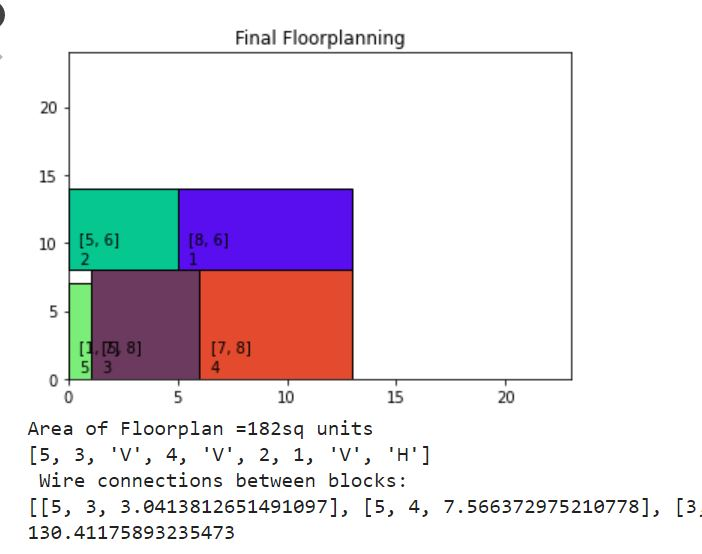



Its not necessary that every execution will give same area because moves are chosen randomly. It may happen that even for same number of iterations once we may get different minimum areas. 